In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Census Income Project
Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [2]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\census income project.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA process

In [4]:
df.shape

(32560, 15)

In [5]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [9]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [10]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [12]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [14]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

# data analysis visulization technique

<AxesSubplot:xlabel='Sex', ylabel='count'>

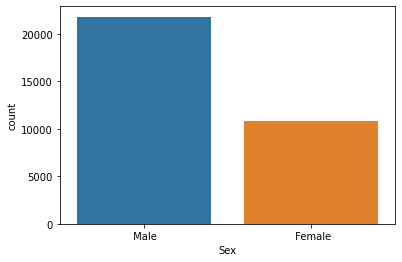

In [15]:
sns.countplot(x='Sex',data=df)

more male person any doing job comparison female analysis 1

<AxesSubplot:xlabel='Race', ylabel='count'>

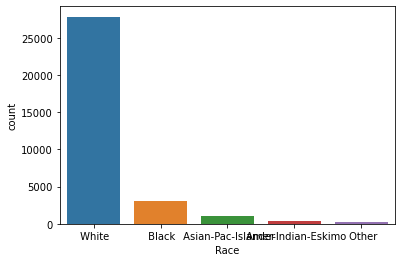

In [17]:
sns.countplot(x='Race',data=df)

white race person more income other than race person analysis 2

<AxesSubplot:xlabel='Relationship', ylabel='count'>

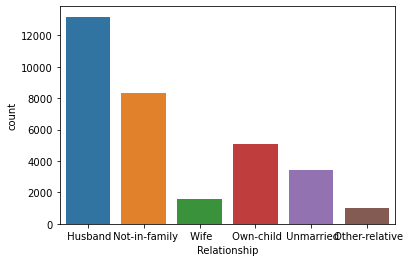

In [19]:
sns.countplot(x='Relationship',data=df)

relationship find the income more husband other than relationship

<AxesSubplot:xlabel='Education', ylabel='count'>

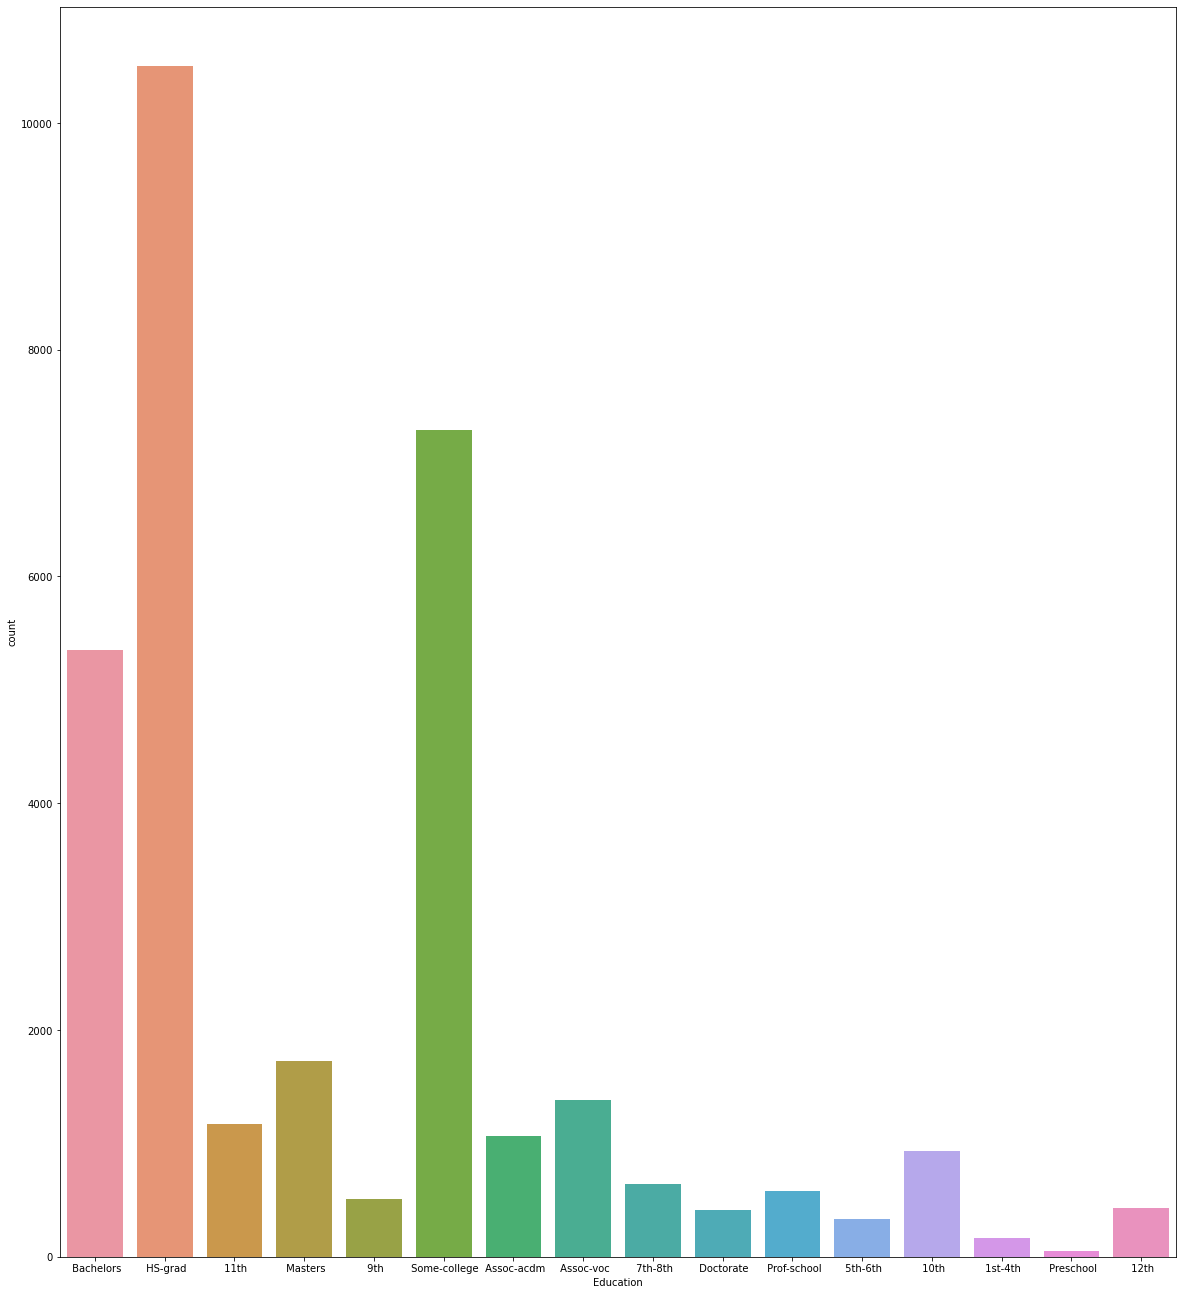

In [21]:
plt.figure(figsize=(20,23))
sns.countplot(x='Education',data=df)

we can do observation that hs-grad higher income gain other than education feild

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

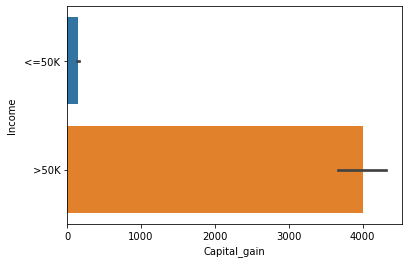

In [31]:
sns.barplot(x='Capital_gain',y='Income',data=df)

capital gain above >50k analysis

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

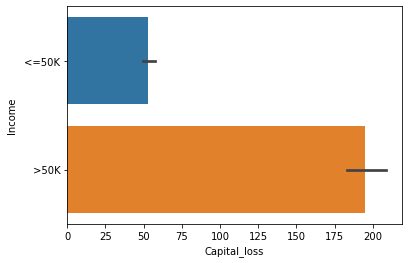

In [32]:
sns.barplot(x='Capital_loss',y='Income',data=df)

capital loss above >50k

<AxesSubplot:xlabel='Workclass', ylabel='count'>

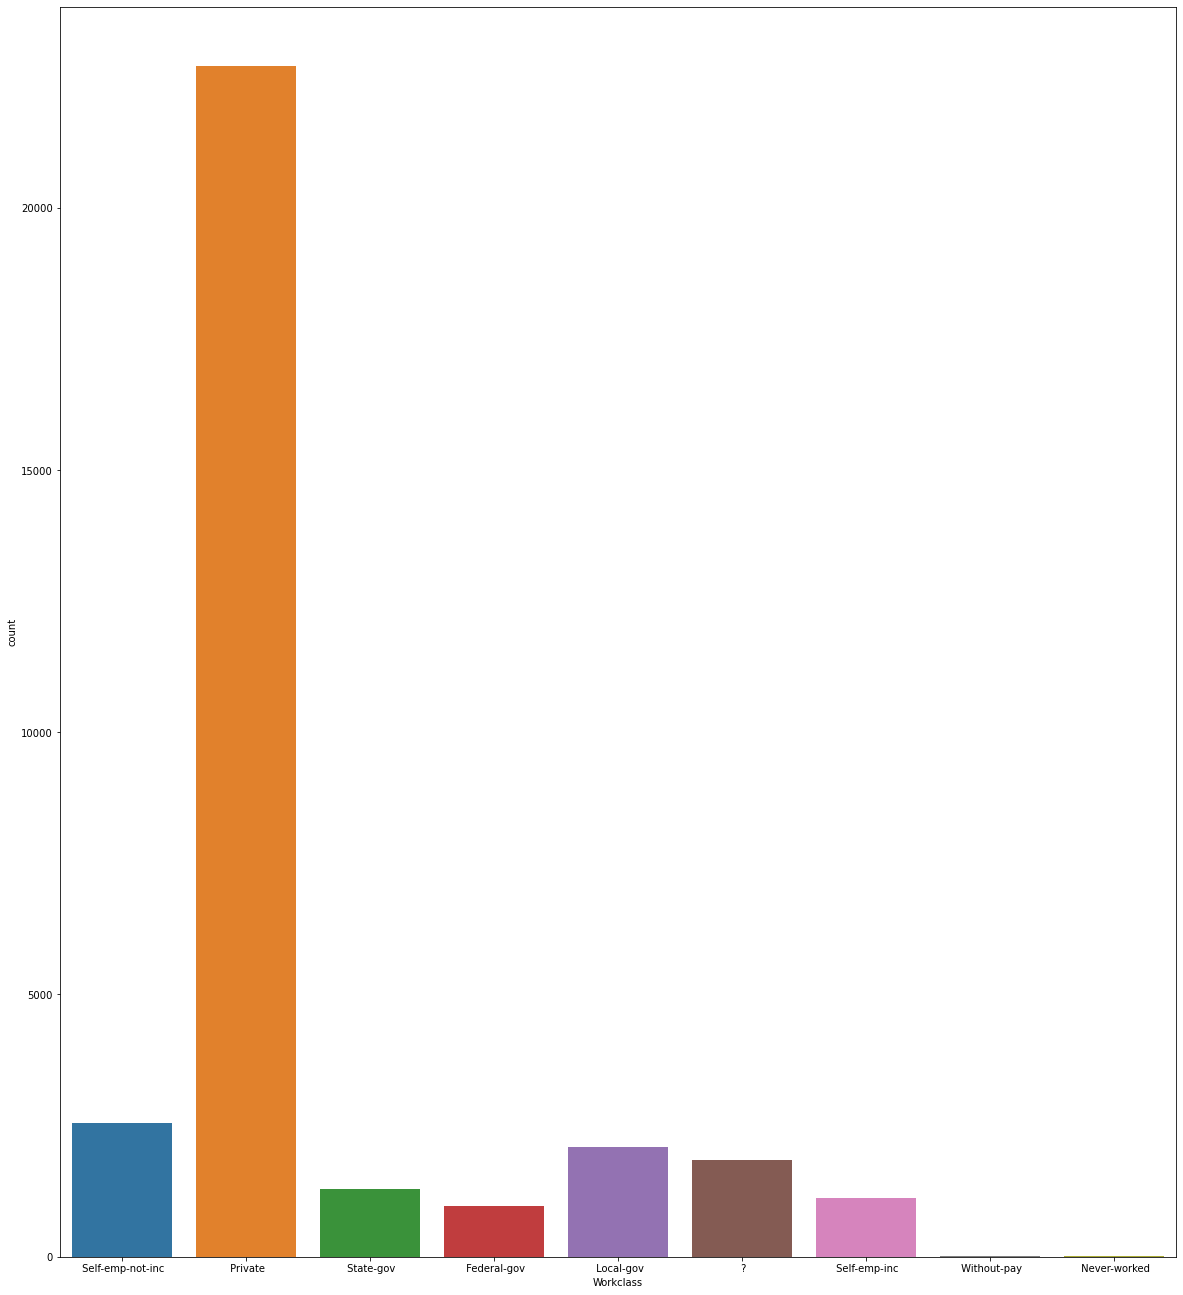

In [35]:
plt.figure(figsize=(20,23))
sns.countplot(x='Workclass',data=df)

private sector gives the more opporchunity othan than analysis

<AxesSubplot:xlabel='Age'>

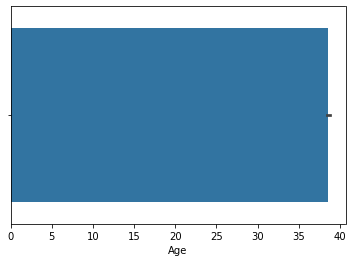

In [39]:
sns.barplot(x = 'Age',data=df)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

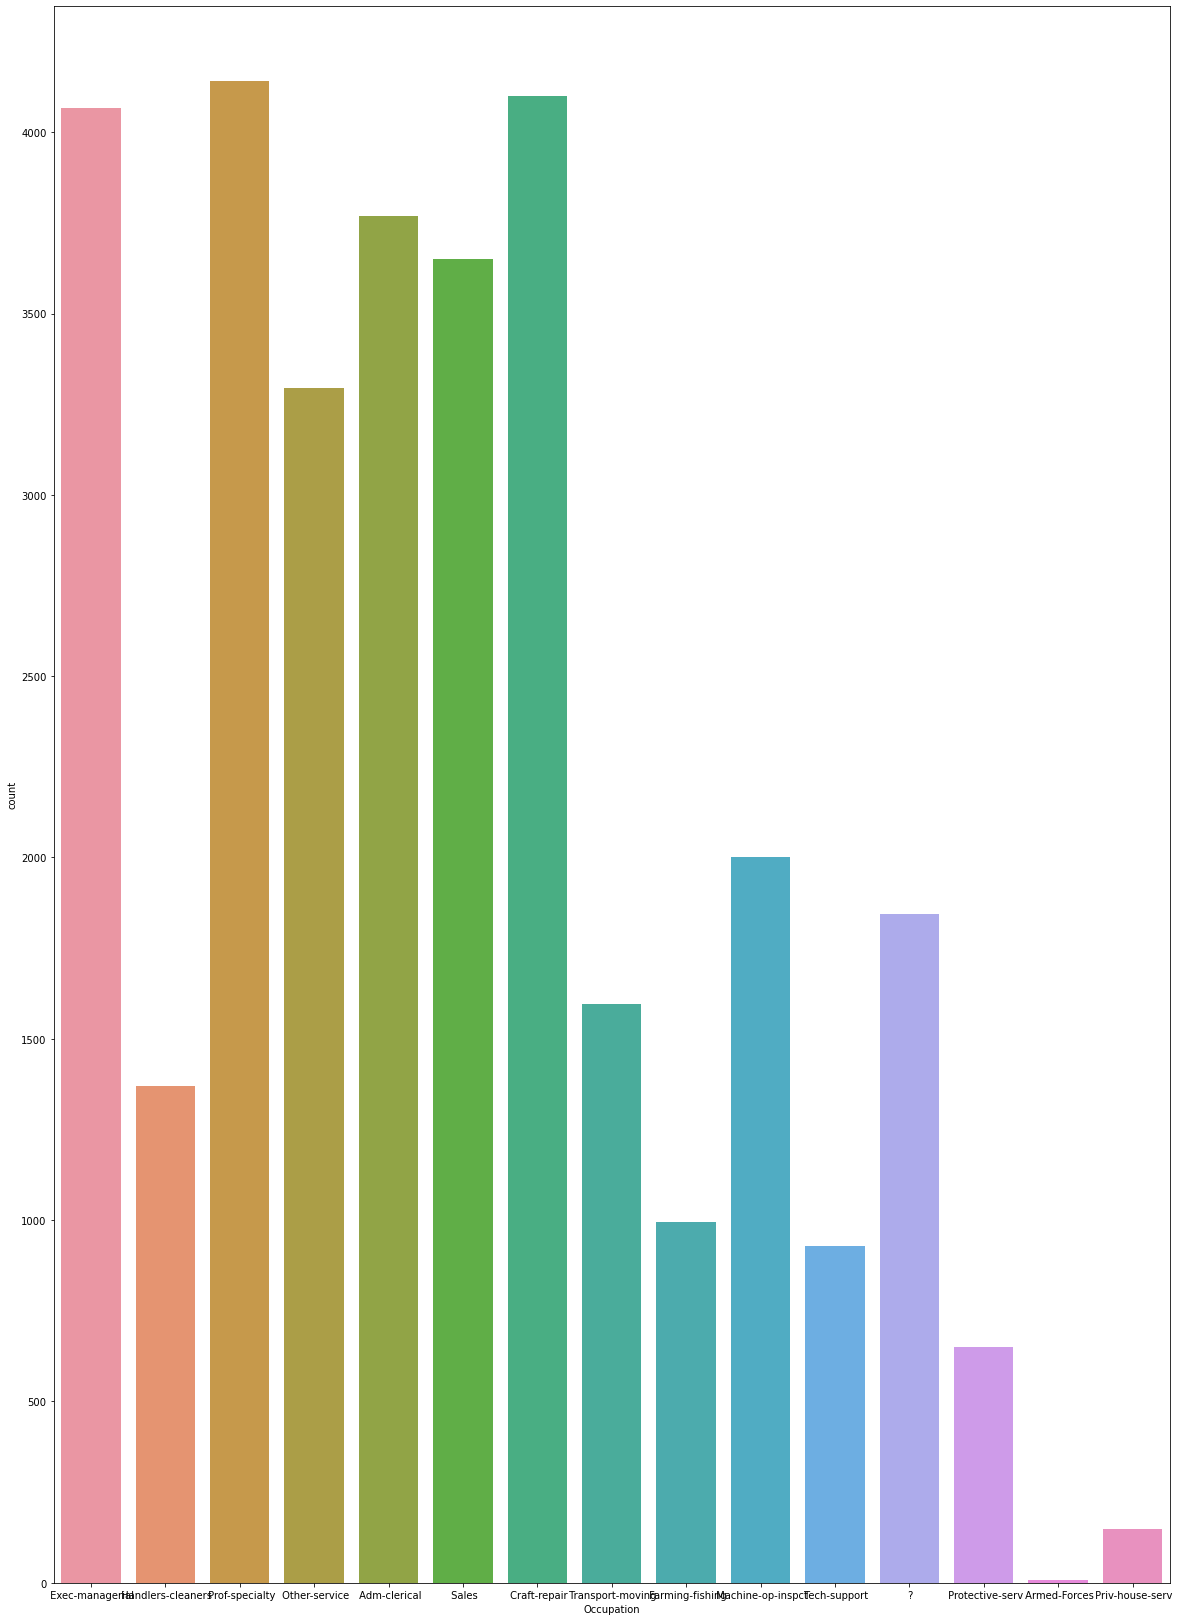

In [23]:
plt.figure(figsize=(20,29))
sns.countplot(x='Occupation',data=df)

more job working prof-specialty other than occupation analysis 5

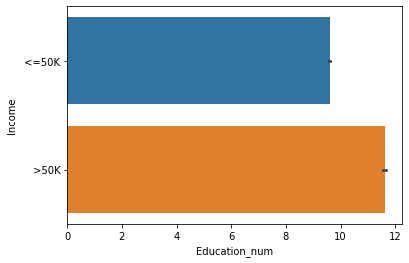

In [28]:
ax = sns.barplot(x="Education_num", y="Income", data=df)

more peson income above >50 for analysis education_num

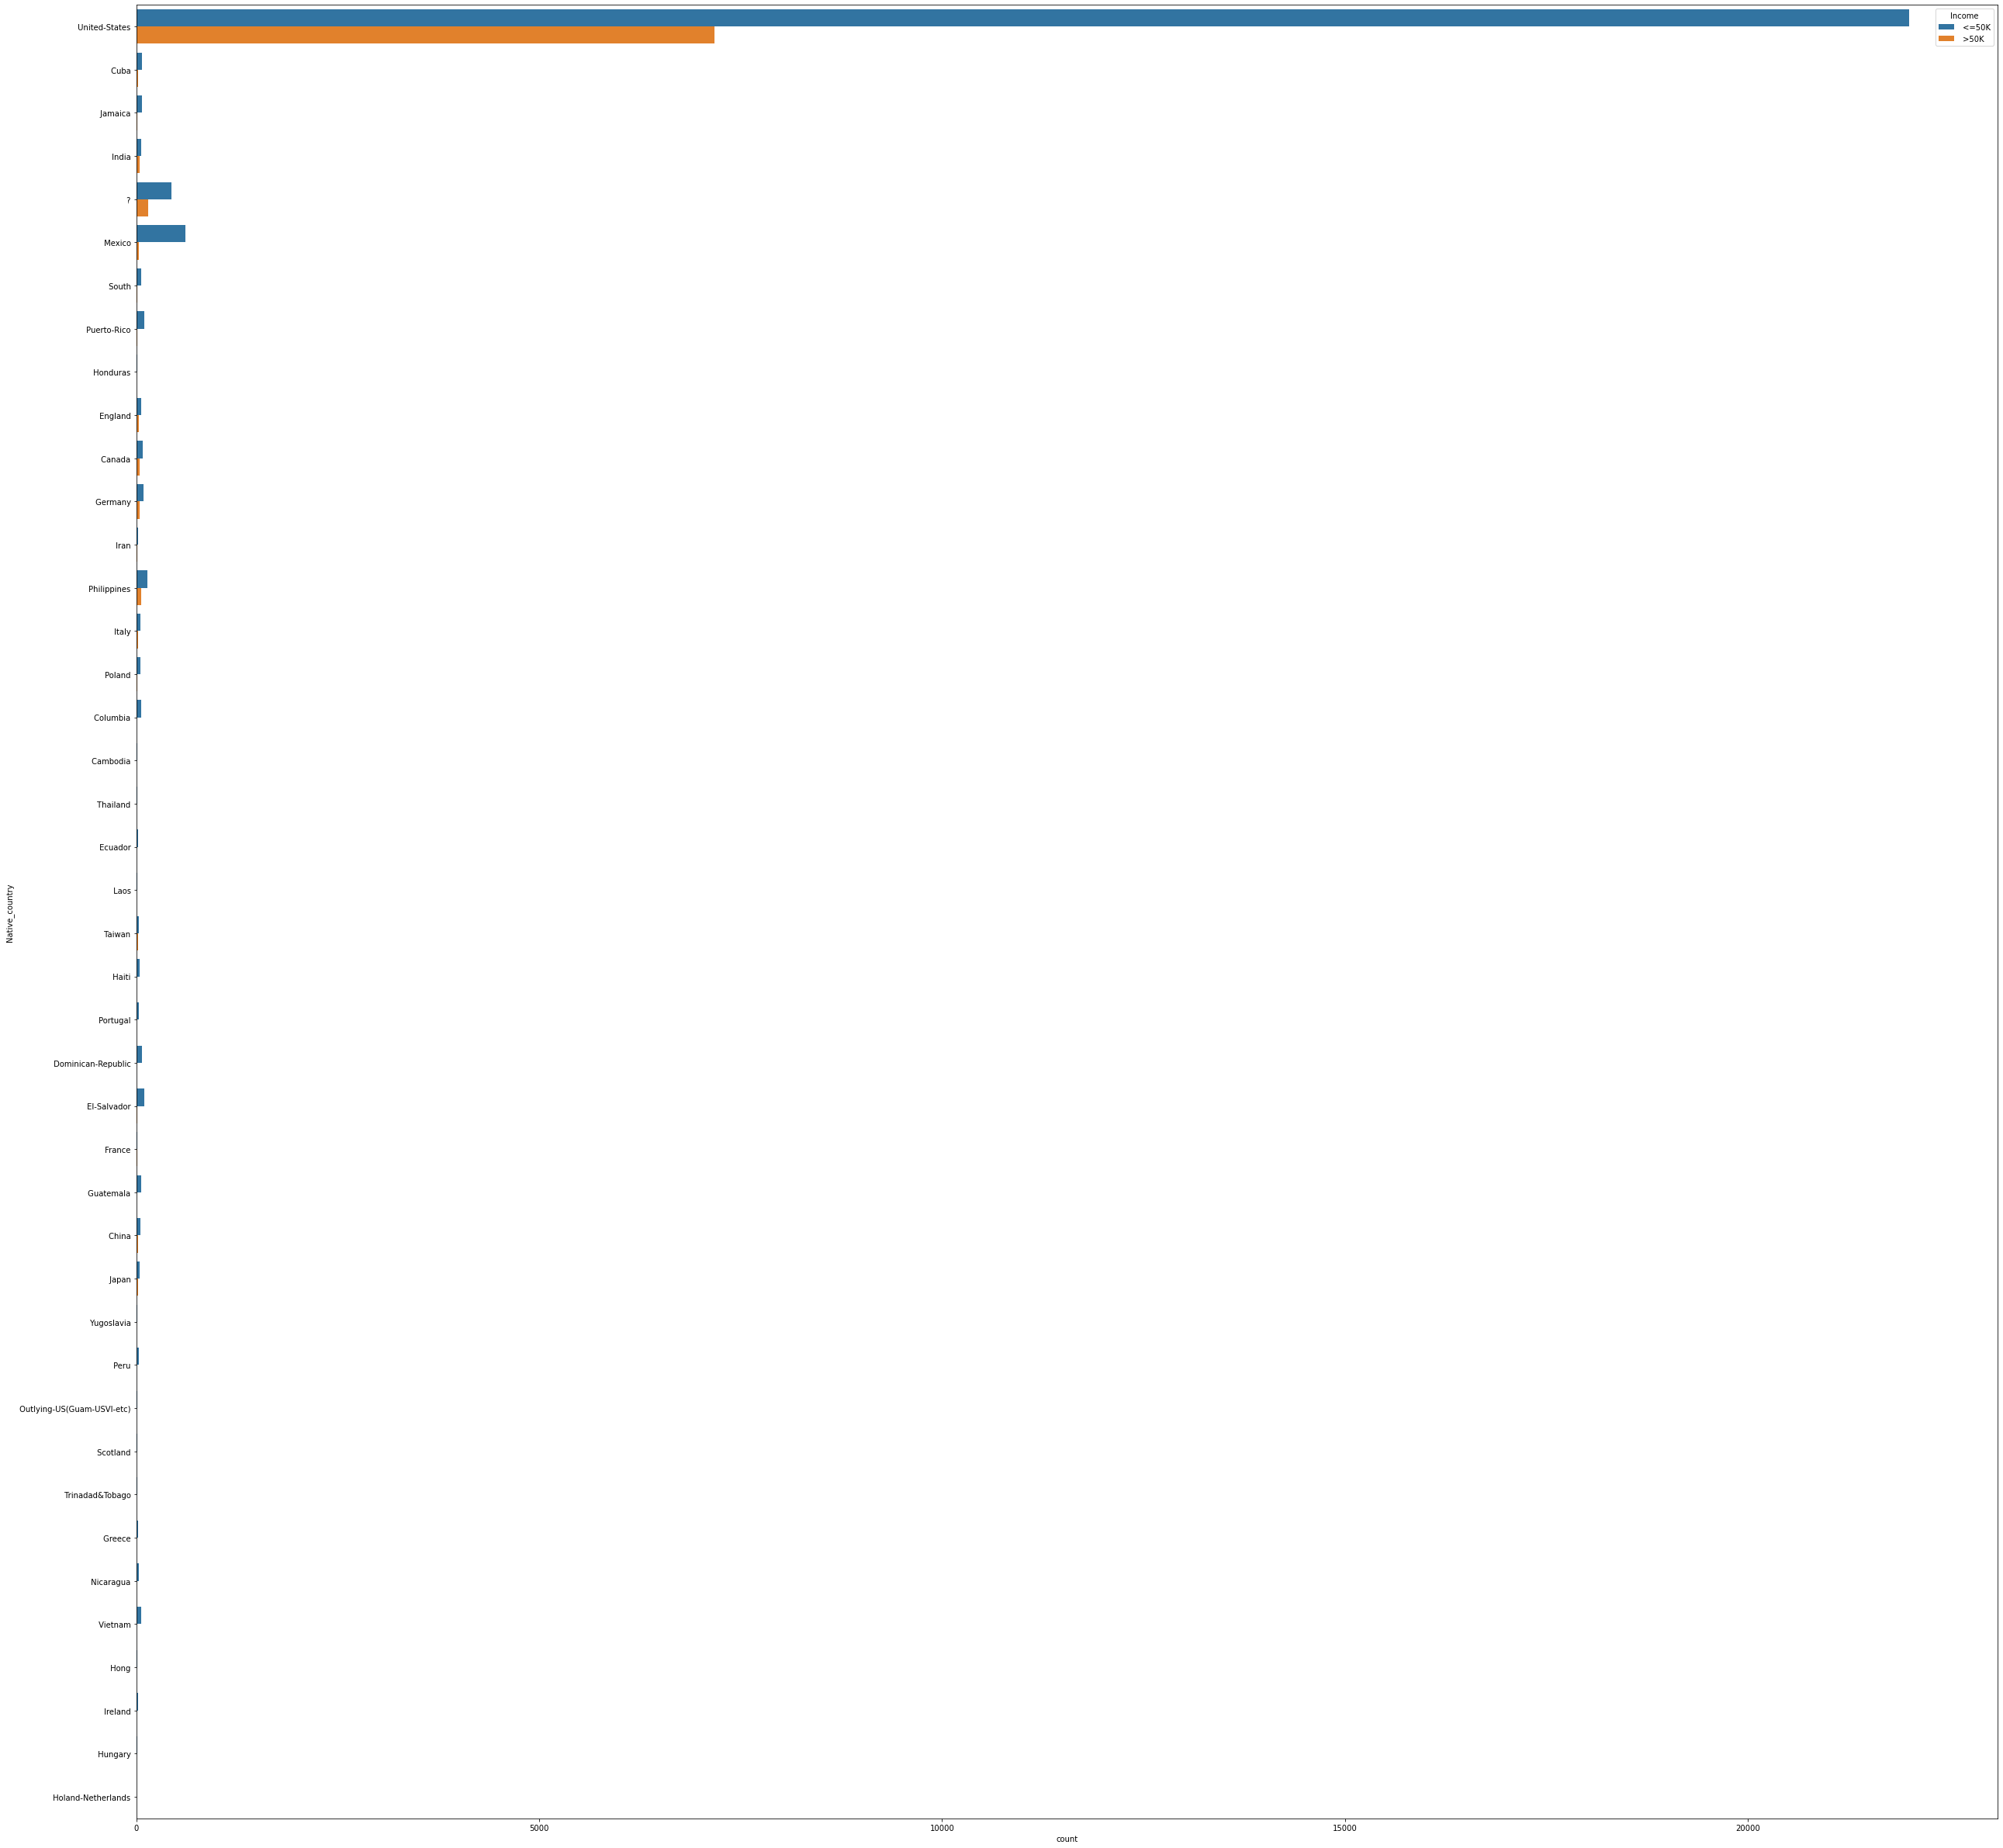

In [40]:
plt.figure(figsize=(43,43))
ax = sns.countplot(y="Native_country", hue="Income", data=df,linewidth=20)

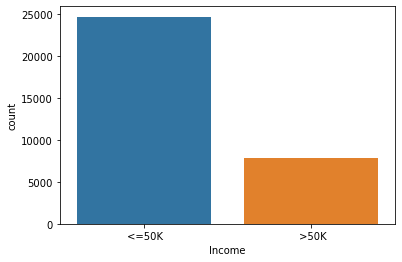

In [41]:
ax = sns.countplot(x="Income", data=df)

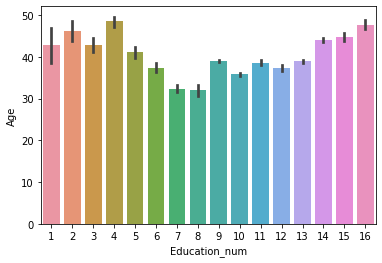

In [42]:
ax = sns.barplot(x="Education_num", y="Age", data=df)


# features engineering technique

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()

In [45]:
df['Income'] = le.fit_transform(df['Income'])

In [46]:
le.fit_transform([0,1])

array([0, 1], dtype=int32)

In [47]:
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

imbalance data

In [48]:
from sklearn.utils import resample

In [49]:
df_majority = df[(df['Income']==0)] 
df_minority = df[(df['Income']==1)]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 24719, 
                                 random_state=42)  
df_upsampled = pd.concat([df_minority_upsampled, df_majority])



In [50]:
df_upsampled['Income'].value_counts()

1    24719
0    24719
Name: Income, dtype: int64

In [51]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [52]:
df1 = df.drop(['Relationship','Native_country'],axis=1,inplace=True)

In [53]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,White,Male,0,0,40,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,White,Female,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,White,Female,0,0,38,0
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,White,Male,0,0,40,1
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,White,Female,0,0,40,0
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,White,Male,0,0,20,0


In [54]:
df = pd.get_dummies(df)

In [55]:
df

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,37,284582,14,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,0,0,38,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32556,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32557,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
32558,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
df.columns

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'Income', 'Workclass_ ?', 'Workclass_ Federal-gov',
       'Workclass_ Local-gov', 'Workclass_ Never-worked', 'Workclass_ Private',
       'Workclass_ Self-emp-inc', 'Workclass_ Self-emp-not-inc',
       'Workclass_ State-gov', 'Workclass_ Without-pay', 'Education_ 10th',
       'Education_ 11th', 'Education_ 12th', 'Education_ 1st-4th',
       'Education_ 5th-6th', 'Education_ 7th-8th', 'Education_ 9th',
       'Education_ Assoc-acdm', 'Education_ Assoc-voc', 'Education_ Bachelors',
       'Education_ Doctorate', 'Education_ HS-grad', 'Education_ Masters',
       'Education_ Preschool', 'Education_ Prof-school',
       'Education_ Some-college', 'Marital_status_ Divorced',
       'Marital_status_ Married-AF-spouse',
       'Marital_status_ Married-civ-spouse',
       'Marital_status_ Married-spouse-absent',
       'Marital_status_ Never-married', 'Marital_status_ Separated',
       'Marit

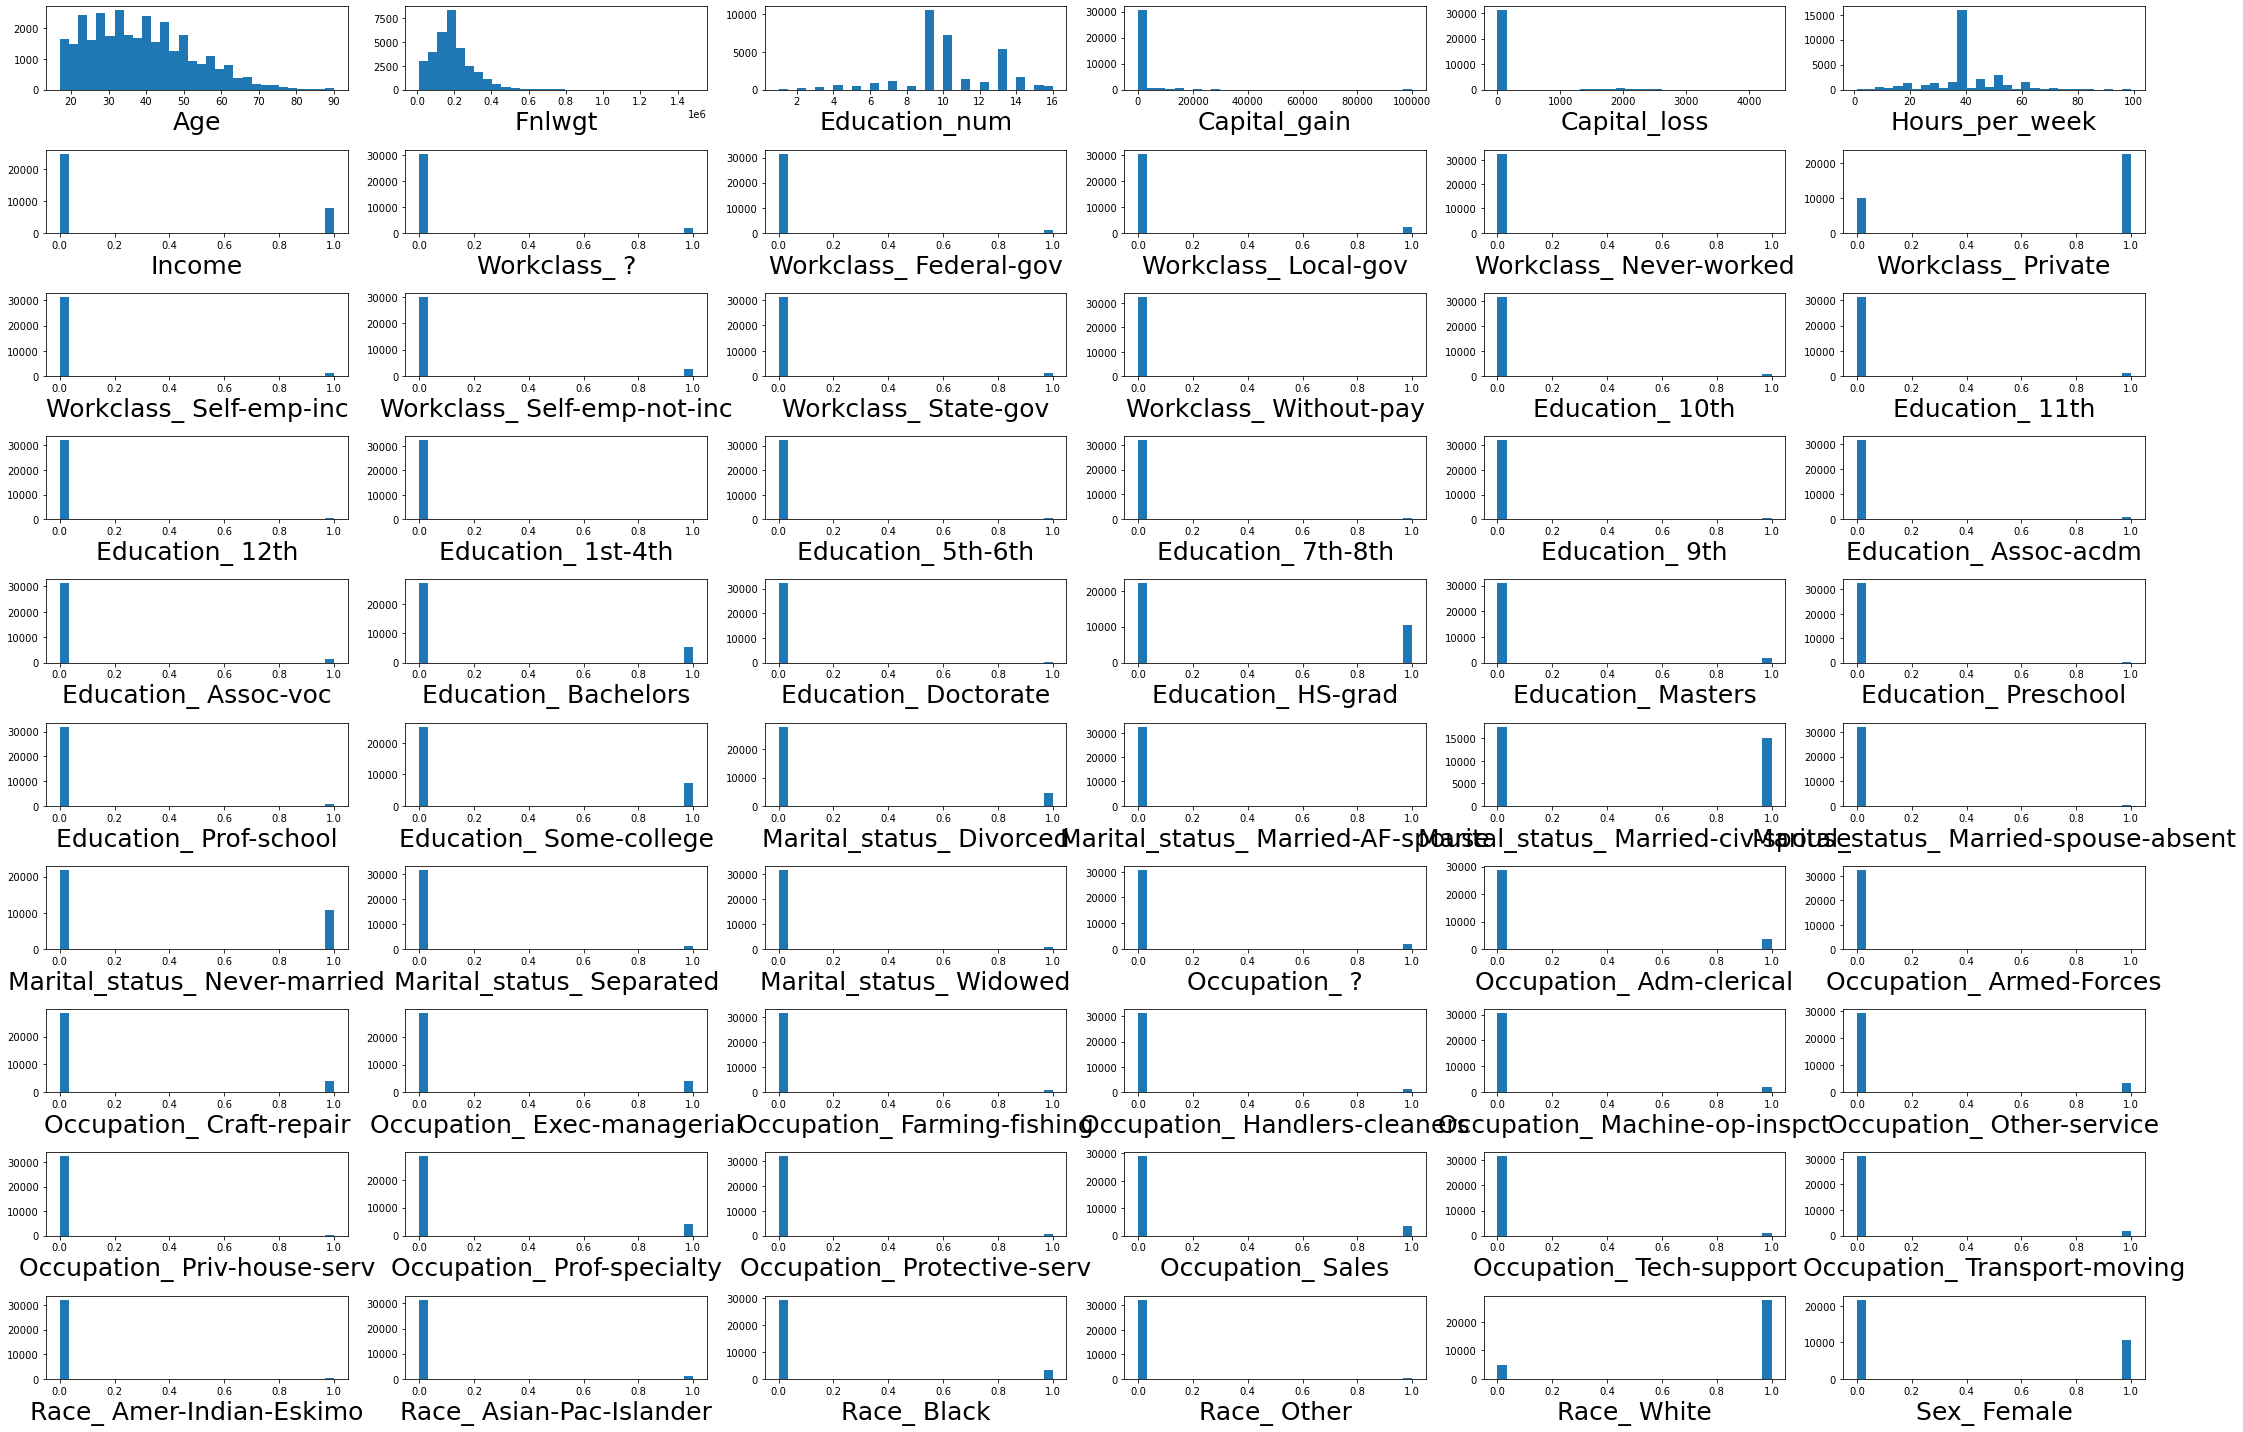

In [57]:
plt.figure(figsize=(30,20))
plotnumber=1

for column in df:
    if plotnumber<=60:
        ax = plt.subplot(10,6,plotnumber)
        plt.hist(df[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        
        plotnumber+=1
plt.tight_layout()        

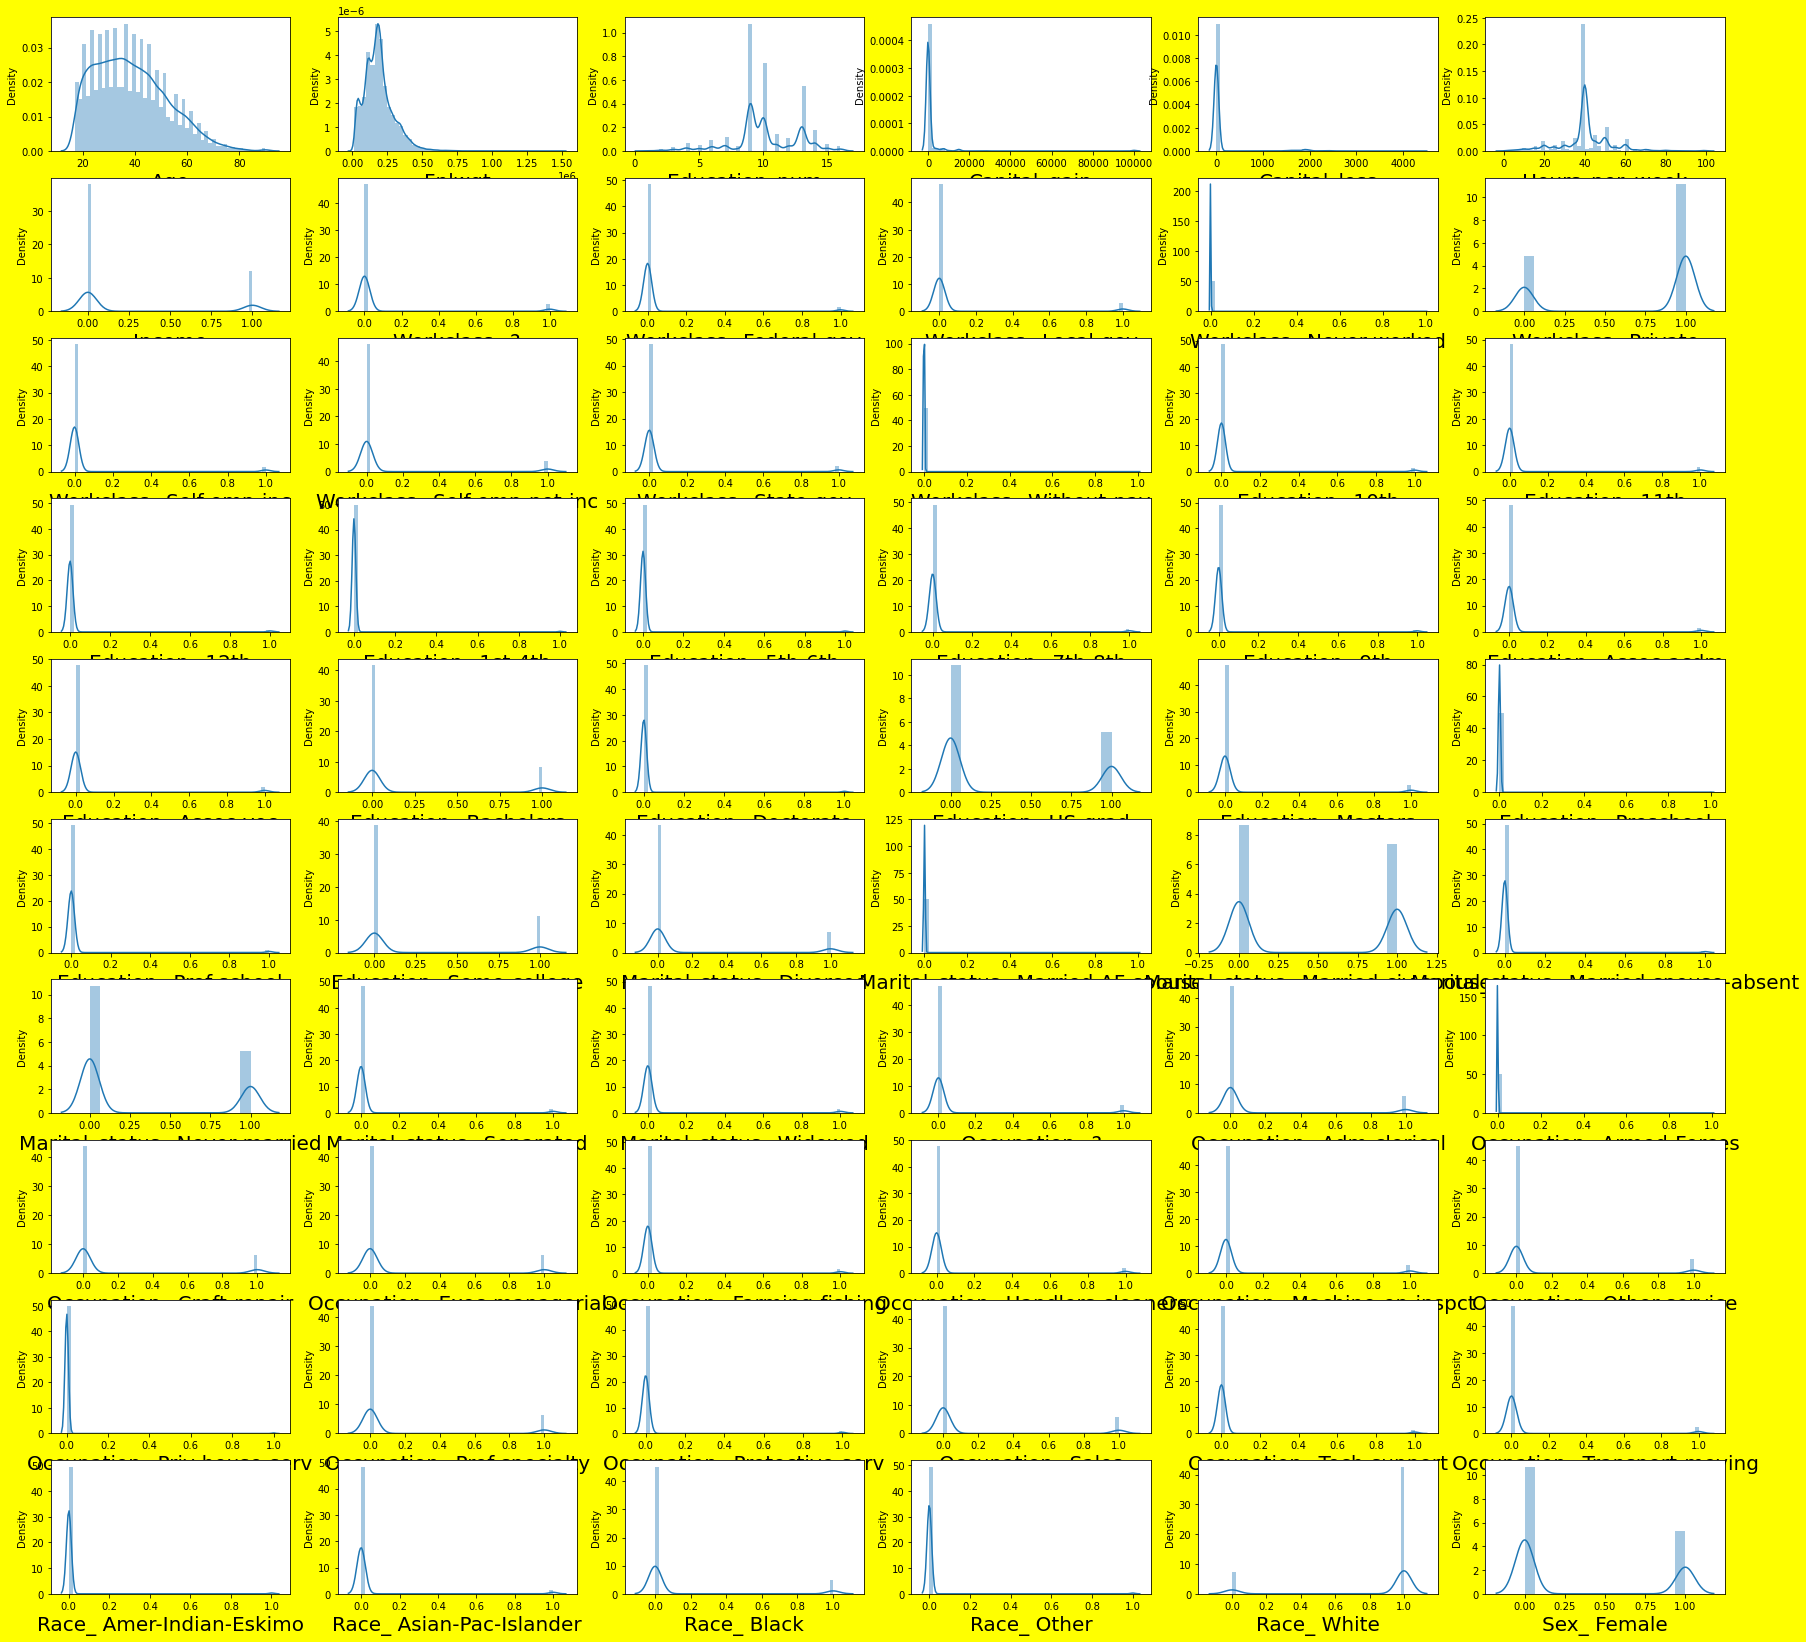

In [58]:
plt.figure(figsize=(30,29),facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=60:
        ax = plt.subplot(10,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [59]:
df.skew()

Age               0.558738
Fnlwgt            1.446972
Education_num    -0.311630
Capital_gain     11.953690
Capital_loss      4.594549
                   ...    
Race_ Black       2.743967
Race_ Other      10.824361
Race_ White      -2.008214
Sex_ Female       0.719244
Sex_ Male        -0.719244
Length: 61, dtype: float64

In [60]:
sk = df.skew()

In [61]:
sk[np.abs(sk)>0.5]

Age                                       0.558738
Fnlwgt                                    1.446972
Capital_gain                             11.953690
Capital_loss                              4.594549
Income                                    1.212383
Workclass_ ?                              3.846469
Workclass_ Federal-gov                    5.563263
Workclass_ Local-gov                      3.553376
Workclass_ Never-worked                  68.182528
Workclass_ Private                       -0.857656
Workclass_ Self-emp-inc                   5.119915
Workclass_ Self-emp-not-inc               3.146333
Workclass_ State-gov                      4.706125
Workclass_ Without-pay                   48.196771
Education_ 10th                           5.650719
Education_ 11th                           4.974973
Education_ 12th                           8.498025
Education_ 1st-4th                       13.814206
Education_ 5th-6th                        9.736367
Education_ 7th-8th             

In [62]:
sk[np.abs(sk)<0.5].all()#acceptable

True

check outliers

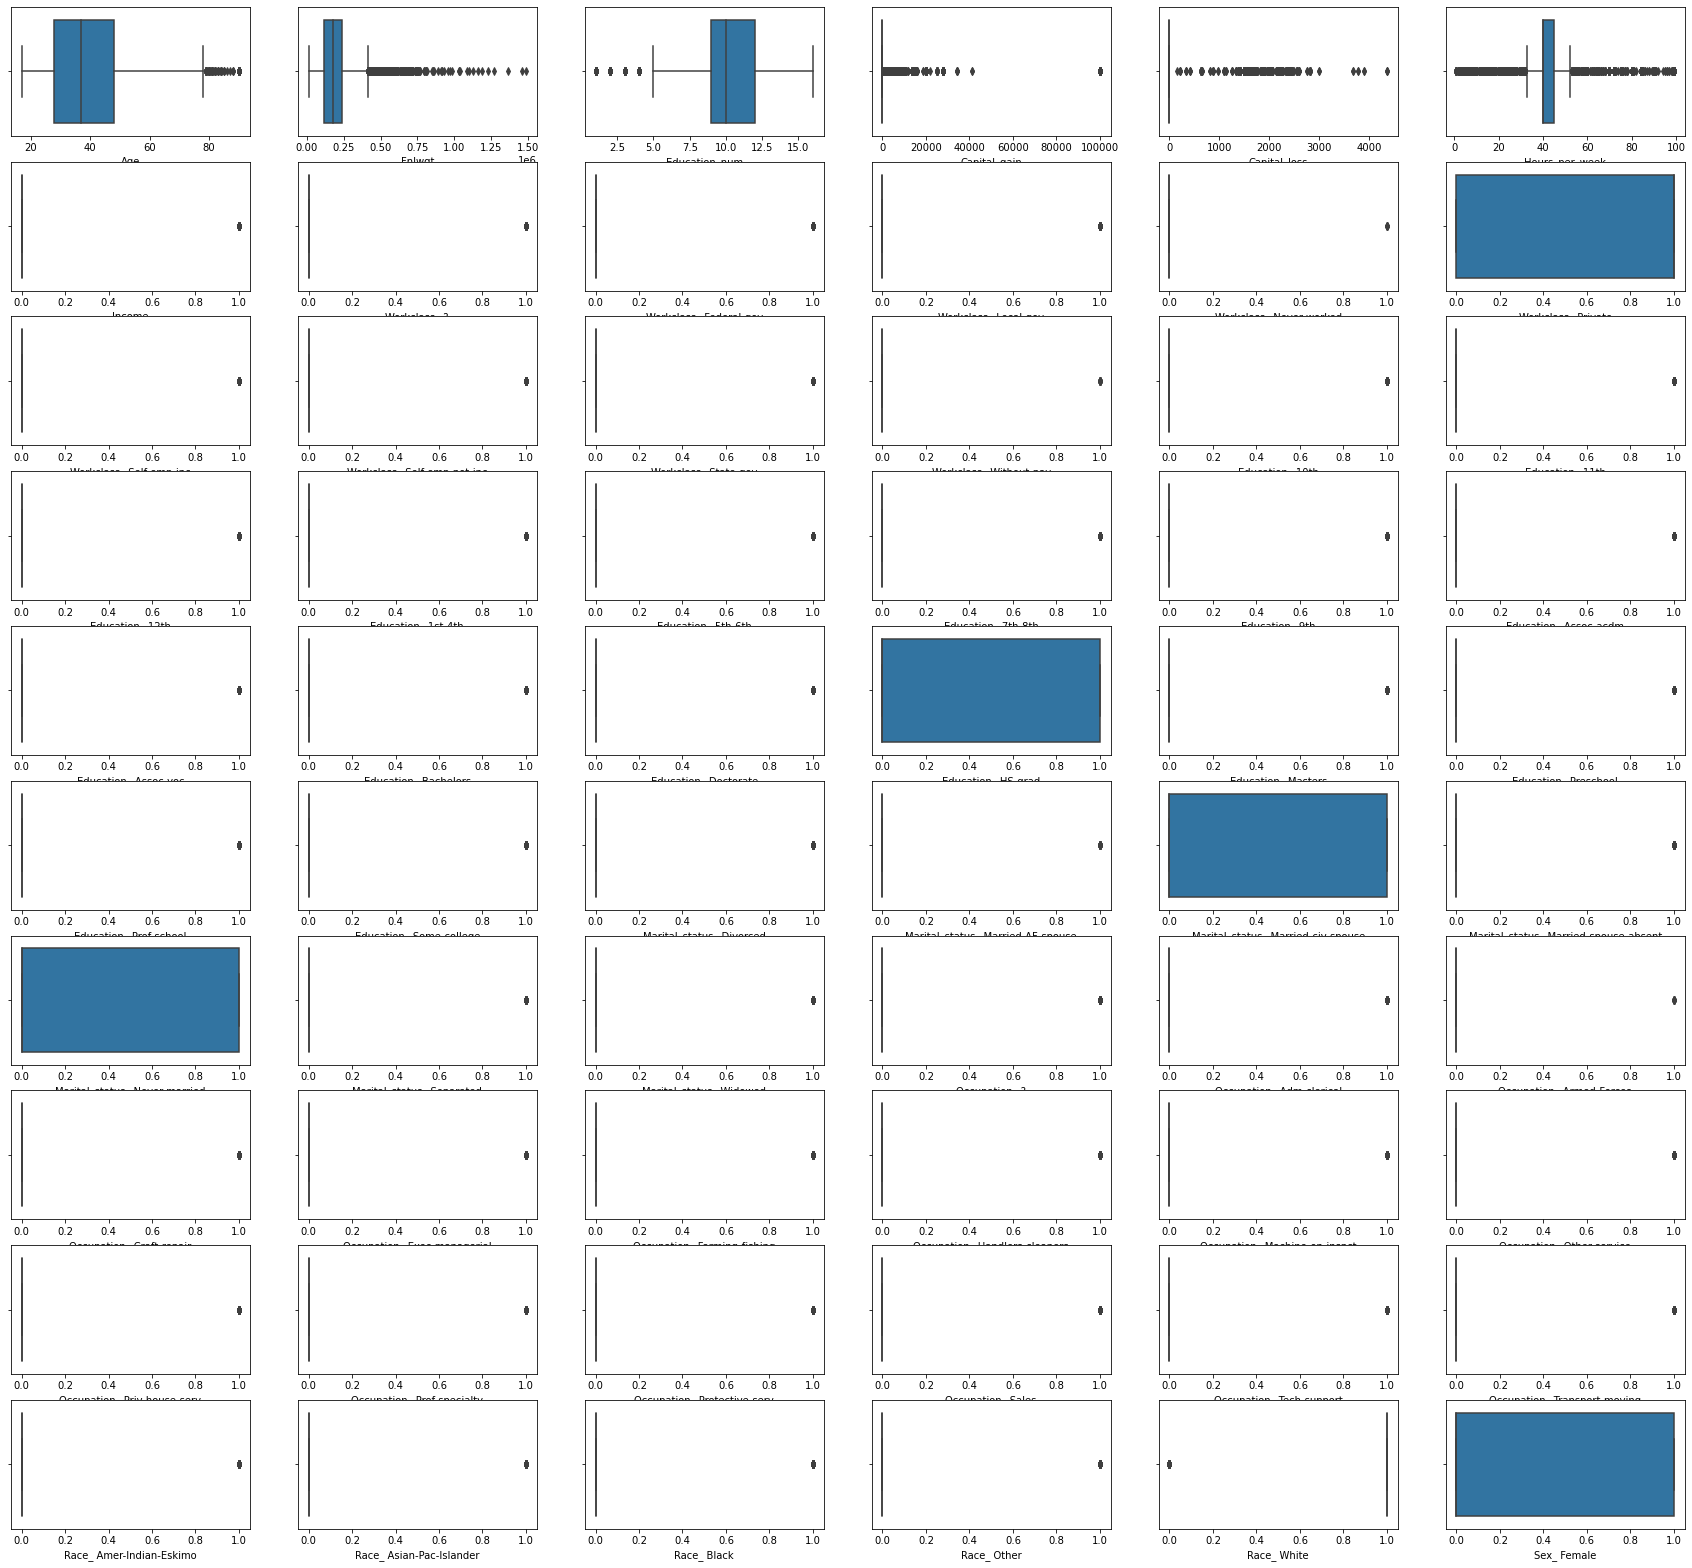

In [63]:
#box plot
plt.figure(figsize=(30,28))
graph = 1
for column in df:
    if graph<=60:
        ax = plt.subplot(10,6,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [64]:
#ist quantile
q1 = df.quantile(0.25)
#2nd quantile
q3 = df.quantile(0.75)
#iqr
iqr = q3-q1


In [65]:
iqr

Age                  20.0
Fnlwgt           119223.0
Education_num         3.0
Capital_gain          0.0
Capital_loss          0.0
                   ...   
Race_ Black           0.0
Race_ Other           0.0
Race_ White           0.0
Sex_ Female           1.0
Sex_ Male             1.0
Length: 61, dtype: float64

In [66]:
df['Fnlwgt'].describe()

count    3.256000e+04
mean     1.897818e+05
std      1.055498e+05
min      1.228500e+04
25%      1.178315e+05
50%      1.783630e+05
75%      2.370545e+05
max      1.484705e+06
Name: Fnlwgt, dtype: float64

In [67]:
print('Highest allowed',df['Fnlwgt'].mean()+3*df['Fnlwgt'].std())
print('Lowest allowed',df['Fnlwgt'].mean()-3*df['Fnlwgt'].std())

Highest allowed 506431.1091465955
Lowest allowed -126867.48039966676


In [68]:
df=df[(df['Fnlwgt']<506431.1091)&(df['Fnlwgt']>-126867.4803 )] 

In [69]:
df['Fnlwgt'].describe()

count     32213.000000
mean     185071.875920
std       94554.419839
min       12285.000000
25%      117496.000000
50%      177387.000000
75%      234373.000000
max      506329.000000
Name: Fnlwgt, dtype: float64

In [70]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Sex_ Female,Sex_ Male
count,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,...,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000,32213.000000
mean,38.615249,185071.875920,10.084717,1079.417378,87.687145,40.441685,0.240928,0.056437,0.029429,0.064322,...,0.112346,0.028405,0.048862,0.009654,0.032254,0.093906,0.008413,0.855773,0.331078,0.668922
std,13.651736,94554.419839,2.570536,7399.432166,403.892899,12.356603,0.427653,0.230767,0.169009,0.245329,...,0.315797,0.166129,0.215583,0.097783,0.176677,0.291703,0.091336,0.351326,0.470608,0.470608
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,117496.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,37.000000,177387.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,48.000000,234373.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,506329.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
iqr[np.abs(iqr)>3].all()

True

In [72]:
print('Highest allowed',df['Age'].mean()+3*df['Age'].std())
print('Lowest allowed',df['Age'].mean()-3*df['Age'].std())

Highest allowed 79.57045754588138
Lowest allowed -2.339960541566356


In [73]:
df=df[(df['Age']<79.57045)&(df['Age']>-2.33996 )] 

In [74]:
df['Age'].describe()

count    32093.000000
mean        38.442308
std         13.378069
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         79.000000
Name: Age, dtype: float64

In [75]:
#ist quantile
q1 = df.quantile(0.25)
#2nd quantile
q3 = df.quantile(0.75)
#iqr
iqr = q3-q1


In [76]:
iqr

Age                  19.0
Fnlwgt           116948.0
Education_num         3.0
Capital_gain          0.0
Capital_loss          0.0
                   ...   
Race_ Black           0.0
Race_ Other           0.0
Race_ White           0.0
Sex_ Female           1.0
Sex_ Male             1.0
Length: 61, dtype: float64

In [77]:
iqr[np.abs(iqr)>3].all()

True

# feature scaling

In [78]:
x = df.drop(['Income'],axis=1)
y = df['Income']

In [79]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [80]:
scaler = StandardScaler()

In [81]:
x_scaled = scaler.fit_transform(x)

In [82]:
x_scaled.shape[1]

60

In [83]:
vif = pd.DataFrame()

In [84]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [85]:
vif['features'] = x.columns

# feature selection

In [86]:
from sklearn.feature_selection import SelectKBest,f_classif

In [88]:
best_features = SelectKBest(score_func=f_classif,k=40)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df.columns)


In [89]:
feature_scores = pd.concat([df_scores,df_columns],axis=1)
feature_scores.columns = ['Score','Feature_Name']#put the column nme


In [90]:
print(feature_scores.nlargest(40,'Score'))

          Score                           Feature_Name
33  7907.770754      Marital_status_ Married-AF-spouse
2   4050.908683                          Education_num
35  3646.388128  Marital_status_ Married-spouse-absent
0   2001.432596                                    Age
5   1780.431270                         Hours_per_week
3   1677.656070                           Capital_gain
58  1572.100066                            Race_ White
59  1572.100066                            Sex_ Female
42  1556.487303               Occupation_ Craft-repair
48  1156.265422            Occupation_ Priv-house-serv
24  1068.761912                   Education_ Assoc-voc
27  1007.137247                     Education_ HS-grad
46   804.091144          Occupation_ Machine-op-inspct
29   785.785565                   Education_ Preschool
4    758.173043                           Capital_loss
11   638.515819                     Workclass_ Private
25   577.557702                   Education_ Bachelors
26   563.0

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# model selection various pipline

# logistic regression 

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [94]:
lm = LogisticRegression()
lm.fit(x_train,y_train)
pred = lm.predict(x_test)
accuracy_sc = accuracy_score(y_test,pred)*100
con_mat = confusion_matrix(y_test,pred)
class_rip = classification_report(y_test,pred)

In [95]:
accuracy_sc

80.02243270189432

In [96]:
con_mat

array([[5891,  200],
       [1403,  530]], dtype=int64)

In [97]:
print(class_rip)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6091
           1       0.73      0.27      0.40      1933

    accuracy                           0.80      8024
   macro avg       0.77      0.62      0.64      8024
weighted avg       0.79      0.80      0.76      8024



logistic regression give the accuracy 80%

# DecisionTreeClassifier

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

81.08175473579263
[[5288  803]
 [ 715 1218]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6091
           1       0.60      0.63      0.62      1933

    accuracy                           0.81      8024
   macro avg       0.74      0.75      0.75      8024
weighted avg       0.81      0.81      0.81      8024



DecisionTreeClassifier accuracy 81% greater than logistic regression

# RandomForestClassifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rr = RandomForestClassifier()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

85.518444666002
[[5645  446]
 [ 716 1217]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6091
           1       0.73      0.63      0.68      1933

    accuracy                           0.86      8024
   macro avg       0.81      0.78      0.79      8024
weighted avg       0.85      0.86      0.85      8024



RandomForestClassifier accuracy 86% greaterthan logistic and decision tree

# SVC

In [100]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


79.54885343968095
[[6087    4]
 [1637  296]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      6091
           1       0.99      0.15      0.27      1933

    accuracy                           0.80      8024
   macro avg       0.89      0.58      0.57      8024
weighted avg       0.84      0.80      0.73      8024



# hyperparameter tunnig

# so analysis good accuracy give random forest so apply


# and check the acuuracy by grid search cv

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [102]:
clf = RandomForestClassifier()

In [103]:
params= {'n_estimators':[13,15],
        'criterion':['entropy','gini'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
         

In [104]:
grid = GridSearchCV(clf,param_grid=params)
grid.fit(x_train,y_train)
print('best_param',grid.best_params_)

best_param {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 15}


In [105]:
clf = grid.best_estimator_
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [106]:
y_pred = clf.predict(x_test)

rf_con_mat = confusion_matrix(y_test,y_pred)


In [107]:
rf_con_mat

array([[5804,  287],
       [ 820, 1113]], dtype=int64)

In [108]:
accuracy_score(y_test,y_pred)

0.8620388833499502

In [109]:
report = classification_report(y_test,y_pred)


print(report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      6091
           1       0.80      0.58      0.67      1933

    accuracy                           0.86      8024
   macro avg       0.84      0.76      0.79      8024
weighted avg       0.86      0.86      0.85      8024



In [111]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [114]:
lr = LogisticRegression()

rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

In [115]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('model trained')

model trained


In [116]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('model trained')

model trained


# check the area under cover train and test model by graph

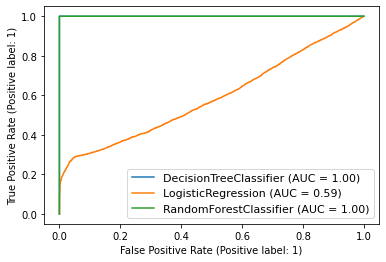

In [117]:
disp = plot_roc_curve(dt,x_train,y_train)

plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)

plt.legend(prop={'size':11},loc='lower right')
plt.show()

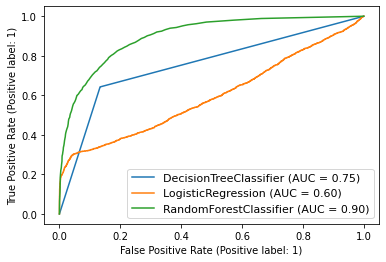

In [118]:
disp = plot_roc_curve(dt,x_test,y_test)

plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)


plt.legend(prop={'size':11},loc='lower right')
plt.show()

# conclusion:-

this data best for random forest model becoze gives the best accuracy